<a href="https://colab.research.google.com/github/daradaaryan/Accuracy-and-Applications-of-Probablistic-Data-Structures/blob/main/Bloom_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mmh3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


True
False
9000.0
4500.0
3000.0
2250.0
1800.0
1500.0
1285.7142857142858
1125.0
1000.0
900.0
818.1818181818181
750.0
692.3076923076923
642.8571428571429
600.0
562.5
529.4117647058823
500.0
473.6842105263158
450.0
428.57142857142856
409.09090909090907
391.30434782608694
375.0
360.0
346.15384615384613
333.3333333333333
321.42857142857144
310.3448275862069
300.0
290.3225806451613
281.25
272.72727272727275
264.70588235294116
257.14285714285717
250.0
243.24324324324326
236.8421052631579
230.76923076923077
225.0
219.5121951219512
214.28571428571428
209.30232558139534
204.54545454545453
200.0
195.65217391304347
191.48936170212767
187.5
183.6734693877551
180.0
176.47058823529412
173.07692307692307
169.81132075471697
166.66666666666666
163.63636363636363
160.71428571428572
157.89473684210526
155.17241379310346
152.54237288135593
150.0
147.54098360655738
145.16129032258064
142.85714285714286
140.625
138.46153846153845
136.36363636363637
134.32835820895522
132.35294117647058
130.43478260869566
128

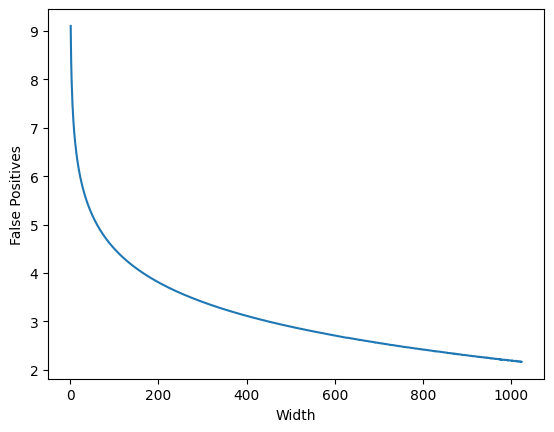

In [ ]:
import mmh3
# import hashlib
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


class BloomFilter:
    def __init__(self, m, k):
        self.m = m
        self.k = k
        self.bits = [False] * m
        self.items = [""]*m
  
    def add(self, item):
         for i in range(self.k):
           # Generate k different hash values using different hash functions and seeds
            hash_value = mmh3.hash(item, i) % self.m
            #h = int(hashlib.sha256(str(item).encode('utf-8')).hexdigest(), 16)
            index = hash_value % self.m
            self.bits[index] = True
            self.items[index] = str(item)

    def contains(self, item):
         for i in range(self.k):
           # Generate k different hash values using different hash functions and seeds
            hash_value = mmh3.hash(item, i) % self.m
            # h = int(hashlib.sha256(str(item).encode('utf-8')).hexdigest(), 16)
            # print(hash_value)
            index = hash_value % self.m
            if not self.bits[index]:
                return False
            return True

bf = BloomFilter(1000, 5)
bf.add('apple')
bf.add('banana')

print(bf.contains('apple'))   # True
print(bf.contains('orange'))  # False

           
           # n wala
# l = []
# for j in range(1000):
#   bf = BloomFilter(1024, 3)
#   li = np.zeros(10000)
#   for i in range(j):
#     bf.add(random.randint(10000))
#   for i in range(10000):
#     li[i] = bf.contains(i)
#   print((li.sum()-j)/1024)
#   l.append((li.sum()-j)/1024)

# m wala
l2 = []
for m in range(1,1025):
  bf = BloomFilter(m, 5)
  li = np.zeros(10000)
  
  for i in range(1000):
    bf.add(str(random.randint(10000)))
  for i in range(10000):
    li[i] = bf.contains(str(i))
  print((li.sum()-1000)/m)
  l2.append((li.sum()-1000)/m)

plt.plot(range(1, 1025), np.log(l2))
plt.xlabel("Width")
plt.ylabel("False Positives")
plt.show()



           
# l = pd.Series(bf.bits)
# x = pd.Series([i for i in range(0, 1024)])
# y = pd.Series(bf.items)
# z = pd.DataFrame({'index': x, 'items':y})
# p

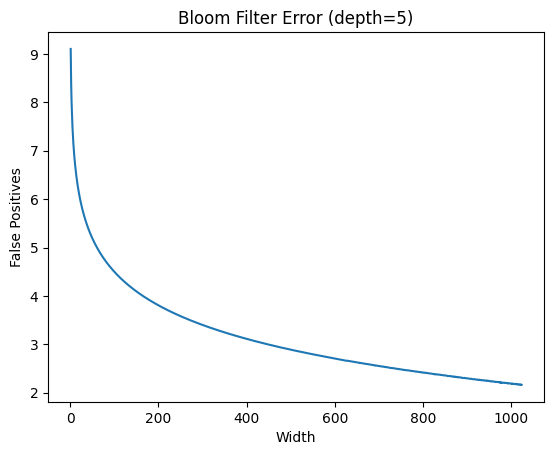

In [7]:
plt.plot(range(1, 1025), np.log(l2))
plt.xlabel("Width")
plt.ylabel("False Positives")
plt.title(f"Bloom Filter Error (depth=5)")
plt.show()